# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

In [3]:
# Select three indices to sample from the dataset
indices = [150, 160, 200]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  16225   1825     1765     853               170          1067
1   1725   3651    12822     824              4424          2157
2   3067  13240    23127    3941              9959           731

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  

**Answer:**
1. Sample 0's purchase cost is higher than the median for Fresh and Delicatessen and could be a small cafe
2. Sample 1's purchase cost is higher than the median for Milk, grocery, detergents_paper and delicatessen and could be a small grocery retailer
3. Sample 2's purchase cost is significantly above the median for Milk, Grocery, detergents_paper and could be a big Grocery retailer

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [4]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Frozen', axis=1)

# Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Frozen'], test_size = 0.25, random_state = 10)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 20)
regressor.fit(X_train, y_train)
regressor.predict(X_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

C:\Users\swetha\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-0.0676638731775


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  

**Answer:**

I tried to predict "Frozen" spending. The reported prediction score is -0.0269. A negative R^2 score implies that the model failed to fit the data. Hence, 'Frozen' is an important and independent feature that is necessary for identifying customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If the feature I attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. 

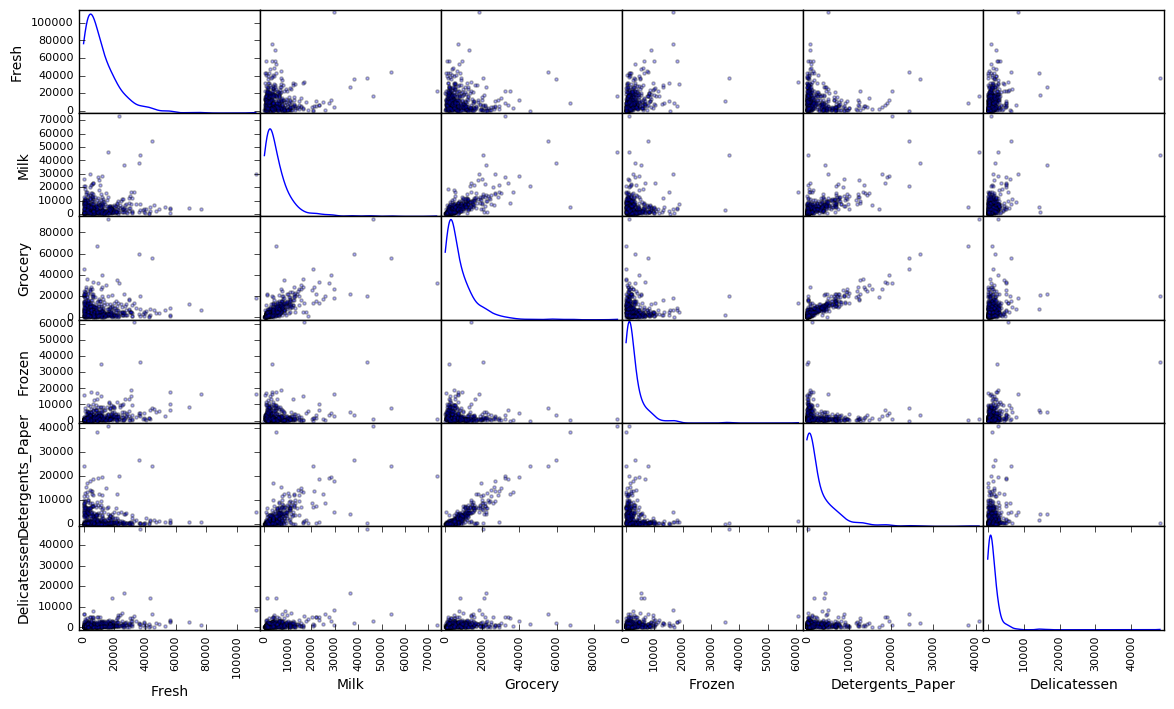

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?* 

**Answer:**

The following pairs of variables exhibit some degree of correlation.
1. Milk and Grocery
2. Milk and Detergent_Paper
3. Grocery and Detergent_Paper

The feature that I attempted to predict, "Frozen" does not seem to be correlated with other features. Hence it confirms my suspicion that "Frozen" feature is relevant and necessary to identify the customer and cannot be removed.

The data for all the features does not seem to have a normal distribution. The distribution is mostly skewed to the right. We also notice this from the basic stats of the dataset, as the mean is above the median for all features.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

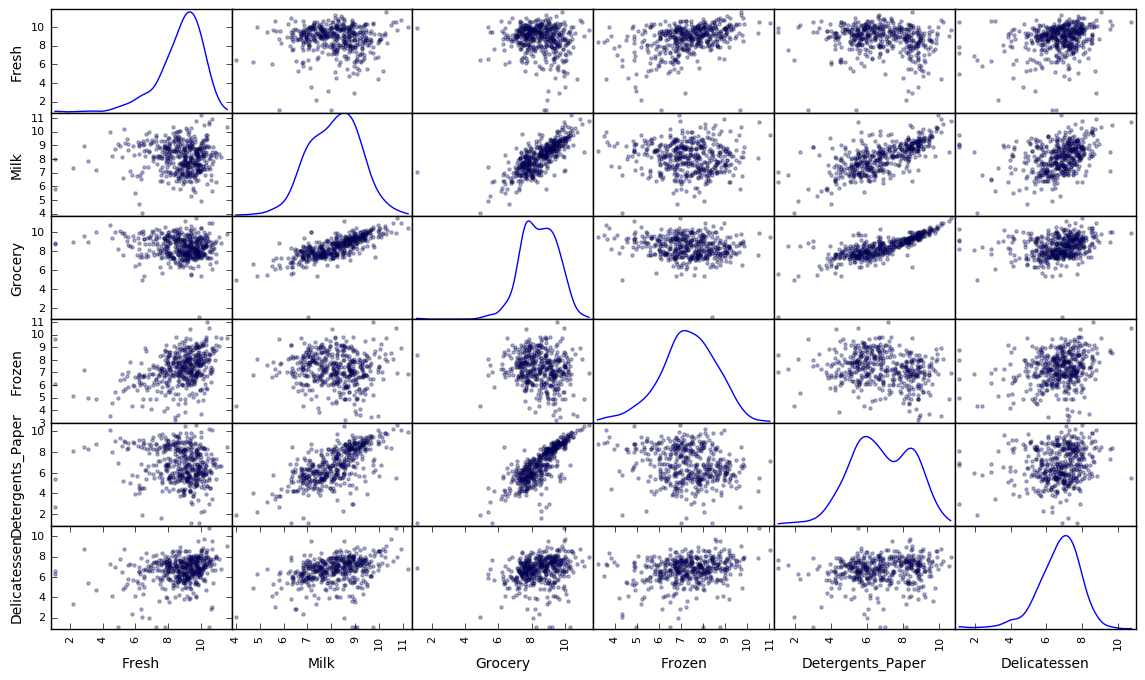

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [7]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.694309  7.509335   7.475906  6.748760          5.135798      6.972606
1  7.452982  8.202756   9.458918  6.714171          8.394800      7.676474
2  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [8]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

From the above tables, the following data points are outliers for more than one feature.

1. Sample 65 is outlier for Fresh and Frozen
2. Sample 66 is outlier for Fresh and Delicatessen
3. Sample 128 is outlier for Fresh and Delicatessen
4. Sample 75 is outlier for Detergents_Paper and Grocery
5. Sample 154 is outlier for Grocery, Milk and Delicatessen

The objective for this project is to capture the majority of customers, that is "the general customer" into clusters. Since clustering algorithms are sensitive to outliers, it would make sense in this case to remove the outliers that are common for more than one feature. This way, we can capture the majority of the customers into appropriate segments and come up with a good predictive model.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. A component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

[[ 0.44302505]
 [ 0.26379218]
 [ 0.1230638 ]
 [ 0.10120908]
 [ 0.04850196]
 [ 0.02040793]]


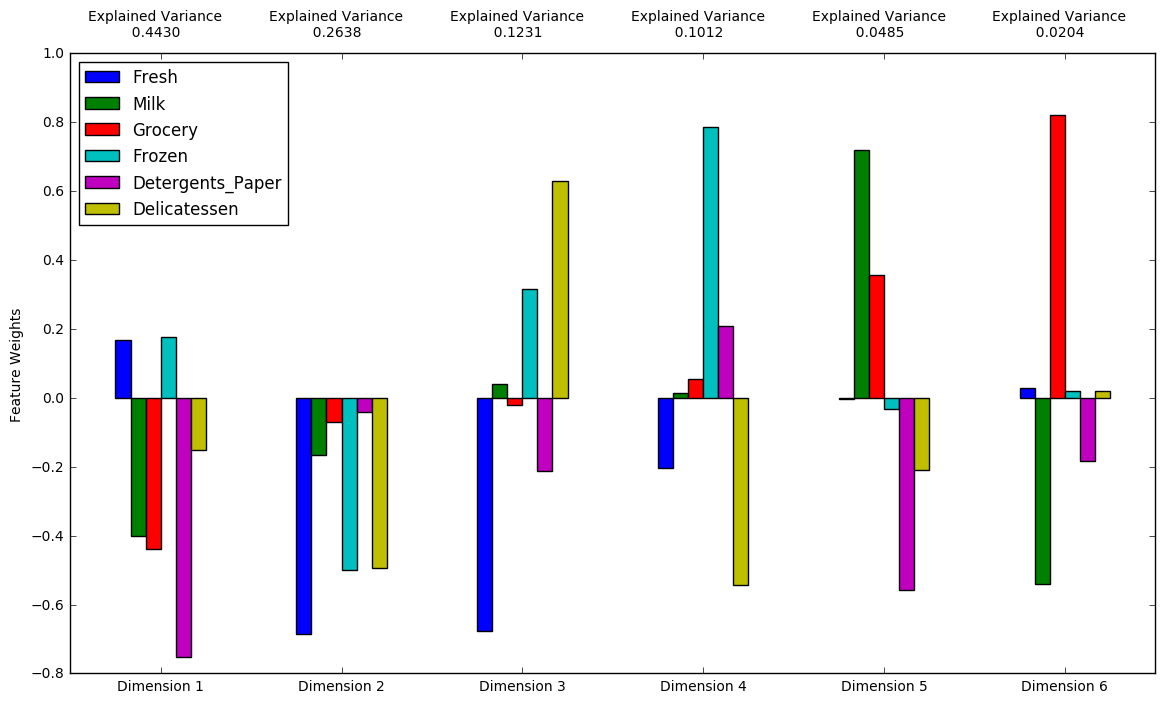

In [9]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  

**Answer:**

The first and second principal component explain a variance of 0.719 in the data
The first four principal components explain a variance of 0.9314 in the data

The first PCA component is positively correlated with Milk, Grocery and Detergents_paper. This could mean that, we have some customers who purchase a lot of Milk, Grocery and Detergents_Paper products while other customers purchase very few amounts of Milk, Grocery and Detergents_Paper, hence spread in the data. So maybe this could represent retail spending.

The second PCA component is positively correlated with Fresh, Frozen and Delicatessen spending. Customers who purchase a lot of fresh are also likely to spend more on frozen and delicatessen. So may be this could represent cafe spending.

The third PCA component is positively correlated with Fresh, but negatively correlated with Delicattesen. This means, customers who have high spending on Fresh are likely to spend less on Delicattesen. So may be this could represent Fresh produce retailer

The fourth PCA component is positively correlated with Frozen, but negatively correlated with Delicatessen and Fresh. This means, customers who have high spending on frozen are likely to spend less on fresh and delicatessen. May be this could represent a fast food restaurant.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.9406      -0.2418      -0.2884      -1.2041       0.0917   
1      -2.1425       0.5705       0.9605      -0.3527      -0.6641   
2      -2.9903      -0.3645       0.2521       1.5653       0.1922   

   Dimension 6  
0      -0.1492  
1       0.4568  
2       0.1244

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [11]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components =2)
pca = pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.9406      -0.2418
1      -2.1425       0.5705
2      -2.9903      -0.3645

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

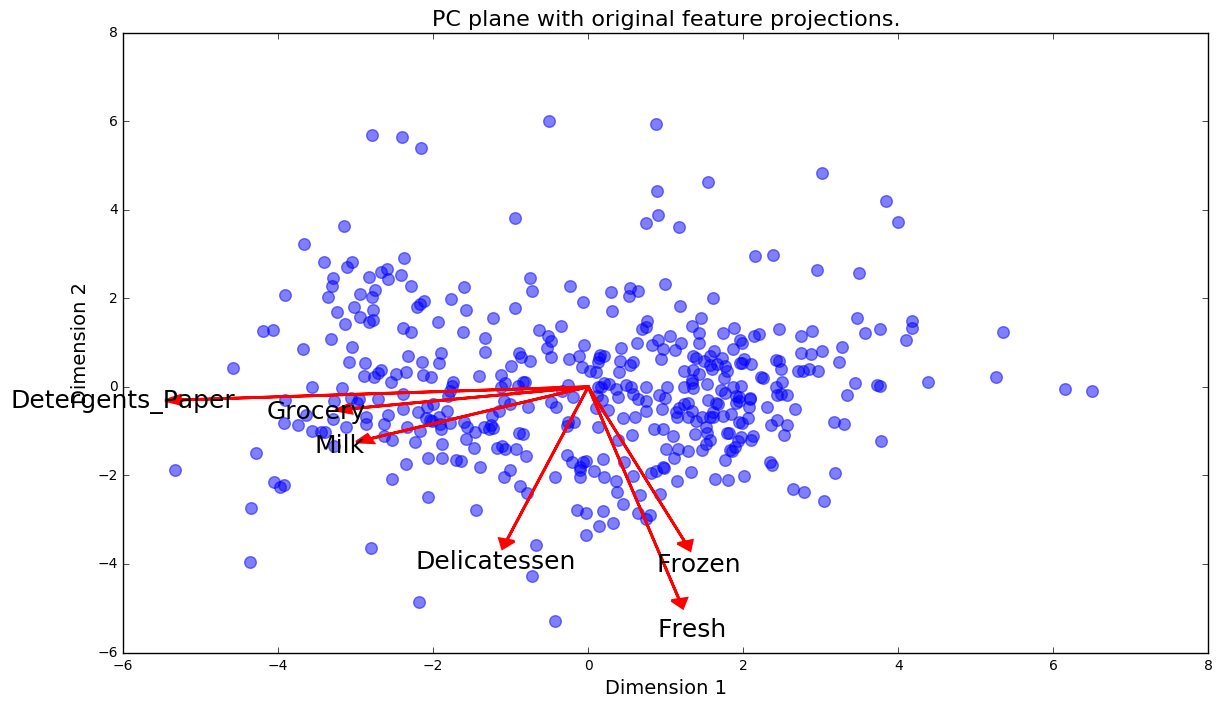

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

## Clustering

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of k-Means clustering

1. Kmeans is one of the simplest algorithms for unsupervised learning and easy to implement.
2. Kmeans scales well to large datasets
3. Kmean is computationally faster than hierarchical clustering

Advantages of Gaussian Mixture Model

1. GMM is more flexible than Kmeans in terms of cluster assignment. GMM can work for rotated or elongates distribution of points in a cluster , instead of spherical distribution only for kmeans
2. GMM allows soft clustering where a point can belong to more than one cluster with different probabilities for each cluster

I will go with Kmeans for this problem as it is simple, faster and considered the go-to general purpose algorithm for clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [14]:
# Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n in range(2,5):
    clusterer = KMeans(n_clusters = n, random_state = 10).fit(reduced_data)

# Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# Find the cluster centers
    centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "Clusters:", n , " score:", score

Clusters: 2  score: 0.426281015469
Clusters: 3  score: 0.390300538799
Clusters: 4  score: 0.332930419681


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score for various cluster numbers are as below:

Clusters: 2  score: 0.426281015469
Clusters: 3  score: 0.390300538799
Clusters: 4  score: 0.332930419681

The best Silhouette score is for 2 clusters

### Cluster Visualization

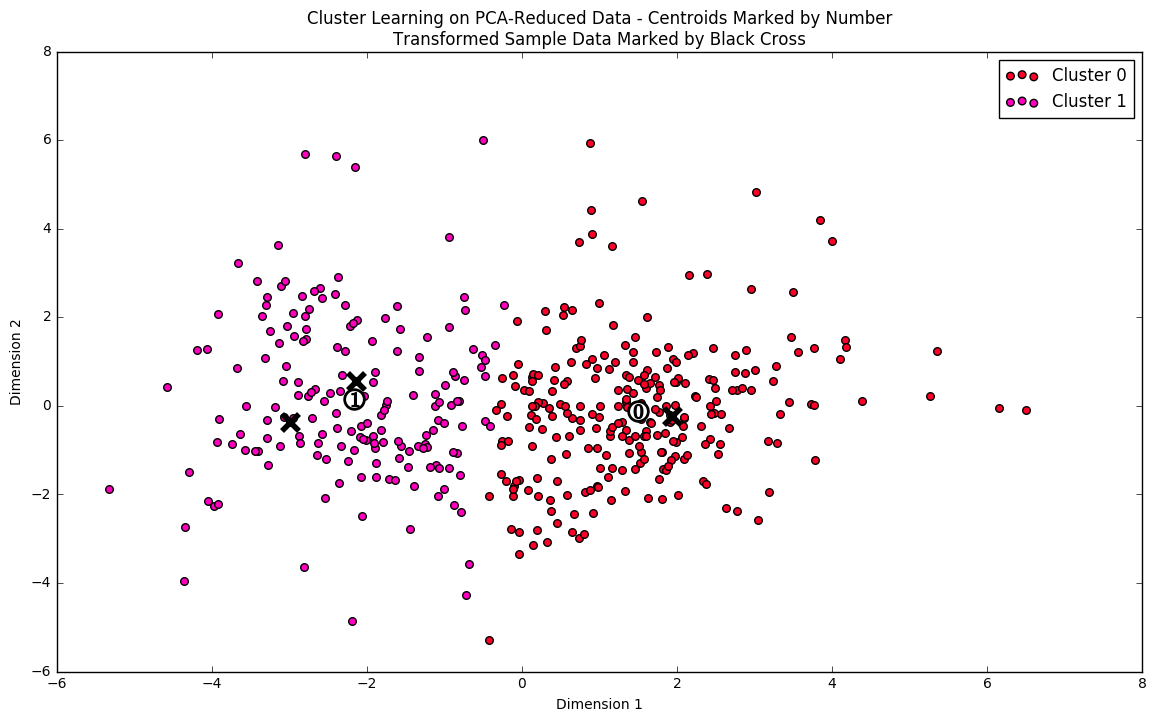

In [15]:
clusterer = KMeans(n_clusters = 2, random_state = 10).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [16]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(np.exp(good_data).describe())


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8867.0  1897.0   2477.0  2088.0             294.0         681.0
Segment 1  4005.0  7900.0  12104.0   952.0            4561.0        1036.0

Fresh          Milk       Grocery        Frozen  \
count     435.000000    435.000000    435.000000    435.000000   
mean    12089.372414   5788.103448   7911.158621   3096.126437   
std     12662.796341   7374.172350   9365.740973   4873.769559   
min         3.000000    112.000000    218.000000     25.000000   
25%      3208.000000   1579.500000   2156.000000    770.500000   
50%      8565.000000   3634.000000   4757.000000   1541.000000   
75%     16934.500000   7168.000000  10665.500000   3559.500000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        435.000000    435.000000  
mean        2848.473563   1536.797701  
std         4679.364623   2833.363881  
min            3.000000      3.000000  
25%          260.000000    411.500000  
50%          813.000000    967.000000  
75%         3935.000000   1825.500000  
max        40827.000000  47943.000000

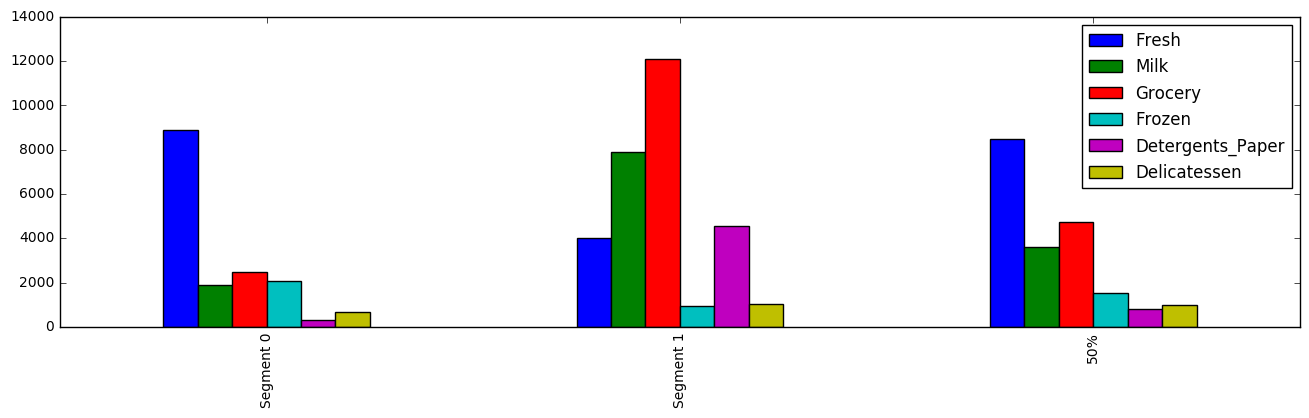

In [17]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  

**Answer:**

Segment 0 has above median spending on Fresh and Frozen and below median spending on milk, grocery, detergents_paper and delicatessen. 

Segment 1 has above median spending on milk, Grocery, Detergents_paper and  delicatessen and below median spending on Frozen and fresh.

Based on the spending patterns, I think,

1. Segment 0 could represent a small cafe or restaurant
2. Segment 1 could represent a grocery retailer

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

In [18]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

Yes, the predictions I made earlier are consistent with the Kmeans clustering output.

1. Sample 0's purchase cost is higher than average for Fresh and Delicatessen and could be a small cafe
2. Sample 1's purchase cost is higher for Milk, grocery, detergents_paper and delicatessen and could be a small grocery retailer
3. Sample 2's purchase cost is significantly above average for Milk, Grocery, detergents_paper and could be a big Grocery retailer

## Conclusion

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  

**Answer:**

In order to test the change in delivery service, we should

1. Conduct two A/B tests, one for each customer segment - Restaurant and Retail. 
2. Select a small, but statistically significant sample from each customer segment to be used as experiment group. 
3. Select the remaining samples in each segment as the control group.
4. Run 3 day delivery service for only the experiment groups for both restaurant and retail segments.
5. Measure customer satisfaction and any other feedback from each customer segment.
6. Launch 3 day delivery service only to the customer segment that reacts positively to the change.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  

**Answer:**

We can use the clustering results as labels and use it along with the other input features to train a supervised classifier that would predict the labels for a new customer.

The target variable will be the customer segment from clustering - Restaurant or Retail

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

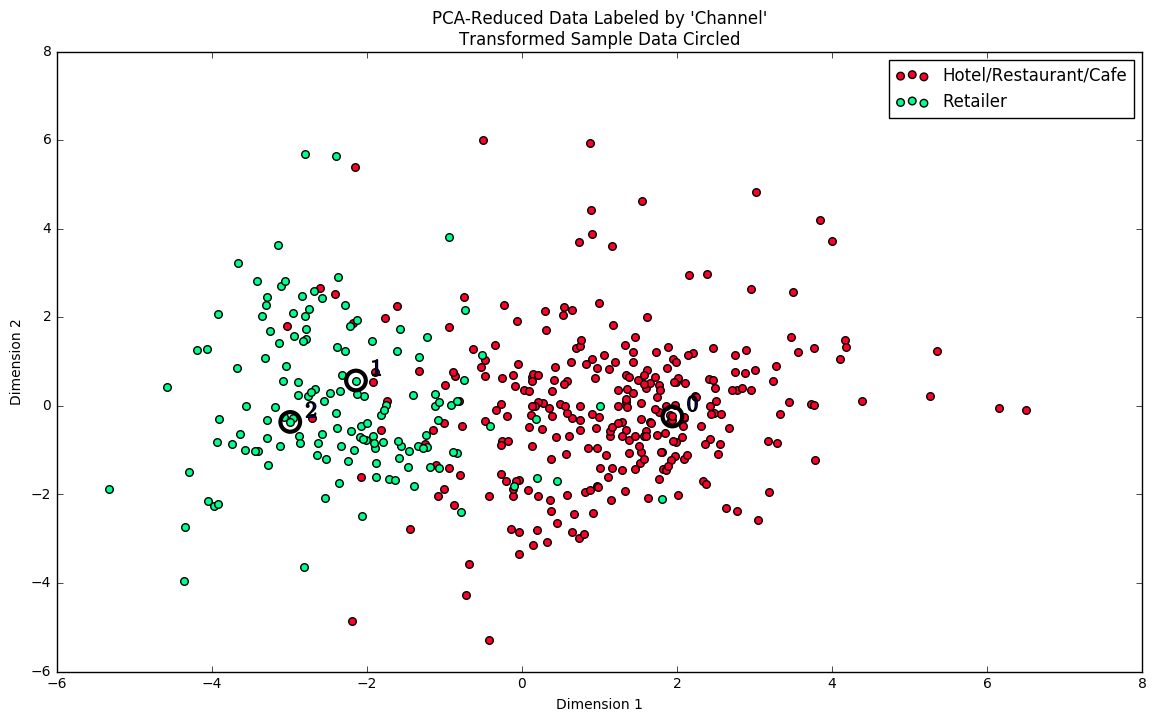

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

This distribution with the channel data included also has the same number of clusters like the one modeled above without the channel feature.

The distribution above does classifiy the customer segments as purely "retailers" or "Hotels/Restaurants/Cafes", although there is some overlap for a few data points between the two segments.

I would consider these classifications as consistent with my previous definition of the customer segments.
